In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pickle
import numpy as np

In [2]:
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

Read Data from csv

In [18]:
datas=pd.read_csv("dataset/data_audio_featurekk.csv")

In [19]:
print(datas.shape)
print(list(datas.columns))

(1597, 43)
['Unnamed: 0', 'Name', 'Gender', 'Age', 'vLT', 'vWT', 'vTT', 'vLF', 'vWF', 'vTF', 'wavName', 'chrMean', 'chrMedian', 'chrMin', 'chrMax', 'censMean', 'censMedian', 'censMin', 'censMax', 'melMean', 'melMedian', 'melMin', 'melMax', 'mfccMean', 'mfccMedian', 'mfccMin', 'mfccMax', 'rmsMean', 'rmsMedian', 'rmsMin', 'rmsMax', 'specCentMean', 'specCentMedian', 'specCentMin', 'specCentMax', 'tonnetzMean', 'tonnetzMedian', 'tonnetzMin', 'tonnetzMax', 'z0Mean', 'z0Median', 'z0Min', 'z0Max']


In [5]:
datas.head()

,Unnamed: 0,Name,Gender,Age,vLT,vWT,vTT,vLF,vWF,vTF,...,specCentMin,specCentMax,tonnetzMean,tonnetzMedian,tonnetzMin,tonnetzMax,z0Mean,z0Median,z0Min,z0Max
0,0,5Forward-20140616-bpk,male,young,10.235859,3.655455,3.775253,10.881111,4.02899,3.981111,...,485.254288,5566.279452,-0.001613,-0.001803,-0.392222,0.370992,0.265072,0.251953,0.023438,0.513672
1,1,5Forward-20140616-bpk,male,young,10.235859,3.655455,3.775253,10.881111,4.02899,3.981111,...,682.758565,5399.884830,-0.007622,-0.002210,-0.315846,0.249627,0.302231,0.347168,0.033203,0.522461
2,2,5Forward-20140616-bpk,male,young,10.235859,3.655455,3.775253,10.881111,4.02899,3.981111,...,487.753177,5041.333820,0.004665,0.000655,-0.362835,0.353750,0.229513,0.161377,0.021973,0.485352
3,3,5Forward-20140616-bpk,male,young,10.235859,3.655455,3.775253,10.881111,4.02899,3.981111,...,493.879823,5542.314843,-0.004689,-0.000647,-0.338084,0.320481,0.237807,0.223633,0.026367,0.529297
4,4,5Forward-20140616-bpk,male,young,10.235859,3.655455,3.775253,10.881111,4.02899,3.981111,...,503.952382,5731.825722,-0.004282,-0.001730,-0.342518,0.400669,0.242281,0.189453,0.028809,0.532227


Age and Gender transform Label Encoder

In [20]:
lb=LabelEncoder()

gender=datas.Gender
gender=lb.fit_transform(gender)
datas.Gender=gender

age=datas.Age
age=lb.fit_transform(age)
datas.Age=age


datas = datas.loc[:, datas.columns.isin(["Unnamed: 0","Name","wavName","melMin","melMax","specCentMin","specCentMax"])==False]
datas.head()

,Gender,Age,vLT,vWT,vTT,vLF,vWF,vTF,chrMean,chrMedian,...,specCentMean,specCentMedian,tonnetzMean,tonnetzMedian,tonnetzMin,tonnetzMax,z0Mean,z0Median,z0Min,z0Max
0,1,1,10.235859,3.655455,3.775253,10.881111,4.02899,3.981111,0.490015,0.536460,...,2586.979504,3001.672789,-0.001613,-0.001803,-0.392222,0.370992,0.265072,0.251953,0.023438,0.513672
1,1,1,10.235859,3.655455,3.775253,10.881111,4.02899,3.981111,0.525348,0.594719,...,2979.457256,3660.877529,-0.007622,-0.002210,-0.315846,0.249627,0.302231,0.347168,0.033203,0.522461
2,1,1,10.235859,3.655455,3.775253,10.881111,4.02899,3.981111,0.472231,0.464159,...,2338.367543,2141.844534,0.004665,0.000655,-0.362835,0.353750,0.229513,0.161377,0.021973,0.485352
3,1,1,10.235859,3.655455,3.775253,10.881111,4.02899,3.981111,0.418396,0.318911,...,2557.267869,2527.800670,-0.004689,-0.000647,-0.338084,0.320481,0.237807,0.223633,0.026367,0.529297
4,1,1,10.235859,3.655455,3.775253,10.881111,4.02899,3.981111,0.462566,0.431203,...,2413.364662,2063.382199,-0.004282,-0.001730,-0.342518,0.400669,0.242281,0.189453,0.028809,0.532227


Data Analisis with AGE 0-adult, 1-young

In [42]:
data["Age"].value_counts()

1    90
0    10
Name: Age, dtype: int64

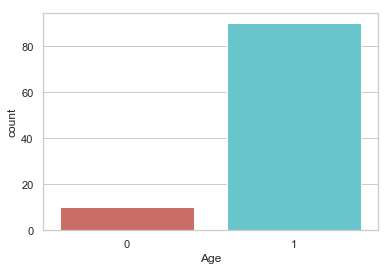

<Figure size 432x288 with 0 Axes>

In [41]:
sns.countplot(x="Age",data=data, palette="hls")
plt.show()
plt.savefig("age.png")

Data Analisis with GENDER, 0-Female, 1-male

1    1567
0      30
Name: Gender, dtype: int64


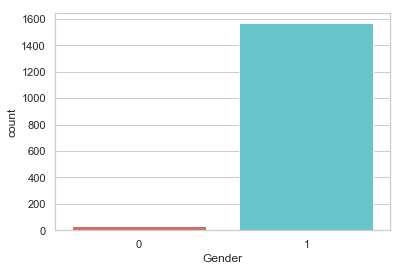

<Figure size 432x288 with 0 Axes>

In [10]:
print(datas["Gender"].value_counts())
sns.countplot(x="Gender",data=datas, palette="hls")
plt.show()
plt.savefig("gender.png")

In [34]:
female=X.query("Gender==0")


In [82]:
female["Age"].value_counts()

1    20
0    10
Name: Age, dtype: int64

In [36]:
male=X.query("Gender==1").tail(70)

In [52]:
data = [female, male]
data=pd.concat(data,ignore_index=True)
data.head()

,Gender,Age,chrMean,chrMedian,chrMin,chrMax,censMean,censMedian,censMin,censMax,...,specCentMean,specCentMedian,tonnetzMean,tonnetzMedian,tonnetzMin,tonnetzMax,z0Mean,z0Median,z0Min,z0Max
0,0,1,0.324349,0.193927,0.001234,1.0,0.229904,0.156992,0.003657,0.671010,...,1730.489522,1583.168457,0.018422,-0.000019,-0.266063,0.337509,0.079203,0.057129,0.021484,0.394043
1,0,1,0.299298,0.153411,0.000837,1.0,0.217497,0.142534,0.001055,0.682200,...,1686.125446,1451.023774,-0.016210,-0.019972,-0.356812,0.345187,0.084036,0.044434,0.012695,0.466797
2,0,1,0.310056,0.171423,0.000640,1.0,0.221357,0.147831,0.000062,0.699245,...,1583.716434,1457.643749,0.009979,-0.015968,-0.372504,0.342085,0.070662,0.040527,0.012695,0.465332
3,0,1,0.295625,0.154964,0.000280,1.0,0.220627,0.151115,0.000000,0.698428,...,1573.558061,1455.913362,0.002592,-0.020408,-0.399816,0.372852,0.062010,0.040039,0.010742,0.355957
4,0,1,0.322497,0.180070,0.000601,1.0,0.216069,0.138608,0.000000,0.675578,...,1581.309384,1387.755933,0.005052,-0.018538,-0.316801,0.385511,0.074496,0.046875,0.010742,0.422852


In [40]:
data.groupby("Age").mean()

,Gender,chrMean,chrMedian,chrMin,chrMax,censMean,censMedian,censMin,censMax,melMean,...,specCentMean,specCentMedian,tonnetzMean,tonnetzMedian,tonnetzMin,tonnetzMax,z0Mean,z0Median,z0Min,z0Max
Age,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.394297,0.344868,0.000415,1.0,0.270165,0.259597,0.045701,0.575890,0.744950,...,1627.104498,1369.677535,-0.002108,-0.001678,-0.329576,0.346815,0.099993,0.077930,0.016357,0.413135
1,0.777778,0.527727,0.581386,0.001295,1.0,0.260773,0.237468,0.024714,0.600949,1.791998,...,1635.158149,1659.701067,0.008524,0.001859,-0.341199,0.342988,0.051926,0.026223,0.003234,0.413601


In [32]:
datas.groupby("Gender").mean()

,Age,vLT,vWT,vTT,vLF,vWF,vTF,chrMean,chrMedian,chrMin,...,specCentMean,specCentMedian,tonnetzMean,tonnetzMedian,tonnetzMin,tonnetzMax,z0Mean,z0Median,z0Min,z0Max
Gender,,,,,,,,,,,,,,,,,,,,,
0,0.666667,12.574007,4.335354,4.340404,13.250034,4.672626,4.550572,0.402827,0.341246,0.001079,...,1570.610974,1262.929269,0.000212,-0.003555,-0.339337,0.341602,0.087215,0.054932,0.009717,0.423161
1,0.516911,15.568379,5.043406,5.147033,16.352319,5.542435,5.409907,0.465545,0.442577,0.006002,...,1543.293760,1424.560565,0.004339,0.001499,-0.321384,0.327521,0.081278,0.061161,0.011219,0.329680


In [81]:
X = data.loc[:, data.columns.isin(["vLT","vWT","vTT","vLF","vWF","vTF"])==False]
X.tail(100)

,Gender,Age,chrMean,chrMedian,chrMin,chrMax,censMean,censMedian,censMin,censMax,...,specCentMean,specCentMedian,tonnetzMean,tonnetzMedian,tonnetzMin,tonnetzMax,z0Mean,z0Median,z0Min,z0Max
50,1,1,0.546418,0.604626,0.000347,1.0,0.272153,0.263427,0.061111,0.539738,...,1634.776594,1772.625811,0.005719,0.001098,-0.356652,0.372637,0.043130,0.016113,0.000000,0.438477
51,1,1,0.517102,0.538990,0.001485,1.0,0.259724,0.242285,0.032020,0.589987,...,1605.773859,1700.166780,0.015316,0.002301,-0.350561,0.381078,0.035795,0.019043,0.000000,0.429199
52,1,1,0.537638,0.604045,0.001740,1.0,0.263110,0.248622,0.017787,0.590389,...,1627.527737,1578.433736,0.008769,0.003343,-0.358384,0.332974,0.045169,0.021729,0.000000,0.380859
53,1,1,0.531417,0.567151,0.001803,1.0,0.260218,0.239537,0.004247,0.633826,...,1625.050236,1723.387726,0.001888,0.001856,-0.417056,0.280630,0.047781,0.021484,0.000000,0.472656
54,1,1,0.581057,0.702354,0.000308,1.0,0.258943,0.240252,0.020357,0.594507,...,1604.790656,1740.738698,0.014427,0.002996,-0.374257,0.372374,0.034396,0.013916,0.000000,0.428223
55,1,1,0.604222,0.745690,0.001016,1.0,0.272605,0.254455,0.045524,0.553307,...,1737.736980,1898.061351,0.012991,0.002462,-0.295991,0.344504,0.038186,0.013428,0.000000,0.371582
56,1,1,0.501618,0.501308,0.000565,1.0,0.270302,0.259303,0.012943,0.576879,...,1539.159254,1328.454832,0.002636,0.003264,-0.371124,0.285817,0.041946,0.023438,0.000000,0.471680
57,1,1,0.591003,0.722334,0.001303,1.0,0.271298,0.257304,0.035251,0.572919,...,1947.553751,1853.974728,0.007047,0.001780,-0.356125,0.343153,0.061281,0.012695,0.000000,0.462891
58,1,1,0.562663,0.674327,0.000956,1.0,0.266651,0.254737,0.019663,0.658768,...,1645.808434,1870.356226,0.013878,0.002387,-0.353668,0.347993,0.043478,0.019043,0.000000,0.448730
59,1,1,0.570301,0.693686,0.000366,1.0,0.265903,0.246101,0.023855,0.610304,...,1663.983859,1883.520113,0.010827,0.000979,-0.356050,0.385359,0.038311,0.021973,0.000000,0.386230


In [22]:
ymVLT="8.45, 15.25"
yfVLT="8.12, 13.24"
ymVWT="3.23, 4.85"
yfVWT="3.20, 4.56"
ymVTT="3.25, 5.25"
yfVTT="3.1, 4.56"

amVLT="18.6, 21.26"
afVLT="14.72, 15.84"
amVWT="5.83, 6.59"
afVWT="4.72, 5.24"
amVTT="5.81, 6.63"
afVTT="4.82, 5.32"

ymVLF="9.09, 15.91"
yfVLF="8.82, 13.94"
ymVWF="3.53, 5.43"
yfVWF="3.49, 4.95"
ymVTF="3.49, 5.36"
yfVTF="3.23, 4.75"

amVLF="18.75, 23.01"
afVLF="15.34, 16.48"
amVWF="6.28, 7.3"
afVWF="5.21, 5.83"
amVTF="6.17, 6.97"
afVTF="5.06, 5.7"


In [23]:
target=["vLT","vWT","vTT","vLF","vWF","vTF"]

In [24]:
from joblib import dump, load

In [66]:
vLT_model =load("vLT.joblib")
vWT_model =load("vWT.joblib")
vTT_model =load("vTT.joblib")
vLF_model =load("vLF.joblib")
vWF_model =load("vWF.joblib")
vTF_model =load("vTF.joblib")

In [72]:
tablo = pd.DataFrame(columns=["Gender","Age",
                              "tahmin_vLT","ref_vLT_min","ref_vLT_max",
                              "tahmin_vWT","ref_vWT_max","ref_vWT_min",
                              "tahmin_vTT","ref_vTT_max","ref_vTT_min",
                              "tahmin_vLF","ref_vLF_max","ref_vLF_min",
                              "tahmin_vWF","ref_vWF_max","ref_vWF_min",
                              "tahmin_vTF","ref_vTF_max","ref_vTF_min"])

In [73]:
vLT=vLT_model.predict(X)
vWT=vWT_model.predict(X)
vTT=vTT_model.predict(X)
vLF=vLF_model.predict(X)
vWF=vWF_model.predict(X)
vTF=vTF_model.predict(X)

In [77]:
for i,Rrow in X.iterrows():
    row={}
    row["Gender"]=Rrow["Gender"]
    row["Age"]=Rrow["Age"]
    if Rrow["Age"]==1:
        if  row["Gender"]==0:#genç kadın
            row["ref_vLT_min"]= yfVLT.split(",")[0]
            row["ref_vLT_max"]= yfVLT.split(",")[1]
            row["ref_vWT_min"]= yfVWT.split(",")[0]
            row["ref_vWT_max"]= yfVWT.split(",")[1]
            row["ref_vTT_min"]= yfVTT.split(",")[0]
            row["ref_vTT_max"]= yfVTT.split(",")[1]
            row["ref_vLF_min"]= yfVLF.split(",")[0]
            row["ref_vLF_max"]= yfVLF.split(",")[1]
            row["ref_vWF_min"]= yfVWF.split(",")[0]
            row["ref_vWF_max"]= yfVWF.split(",")[1]
            row["ref_vTF_min"]= yfVTF.split(",")[0]
            row["ref_vTF_max"]= yfVTF.split(",")[1]            
        else: #genç erkek
            row["ref_vLT_min"]= ymVLT.split(",")[0]
            row["ref_vLT_max"]= ymVLT.split(",")[1]
            row["ref_vWT_min"]= ymVWT.split(",")[0]
            row["ref_vWT_max"]= ymVWT.split(",")[1]
            row["ref_vTT_min"]= ymVTT.split(",")[0]
            row["ref_vTT_max"]= ymVTT.split(",")[1]
            row["ref_vLF_min"]= ymVLF.split(",")[0]
            row["ref_vLF_max"]= ymVLF.split(",")[1]
            row["ref_vWF_min"]= ymVWF.split(",")[0]
            row["ref_vWF_max"]= ymVWF.split(",")[1]
            row["ref_vTF_min"]= ymVTF.split(",")[0]
            row["ref_vTF_max"]= ymVTF.split(",")[1] 
    else:
        if  row["Gender"]==0:#olgun kadın
            row["ref_vLT_min"]= afVLT.split(",")[0]
            row["ref_vLT_max"]= afVLT.split(",")[1]
            row["ref_vWT_min"]= afVWT.split(",")[0]
            row["ref_vWT_max"]= afVWT.split(",")[1]
            row["ref_vTT_min"]= afVTT.split(",")[0]
            row["ref_vTT_max"]= afVTT.split(",")[1]
            row["ref_vLF_min"]= afVLF.split(",")[0]
            row["ref_vLF_max"]= afVLF.split(",")[1]
            row["ref_vWF_min"]= afVWF.split(",")[0]
            row["ref_vWF_max"]= afVWF.split(",")[1]
            row["ref_vTF_min"]= afVTF.split(",")[0]
            row["ref_vTF_max"]= afVTF.split(",")[1] 
        else: #olgun erkek
            row["ref_vLT_min"]= amVLT.split(",")[0]
            row["ref_vLT_max"]= amVLT.split(",")[1]
            row["ref_vWT_min"]= amVWT.split(",")[0]
            row["ref_vWT_max"]= amVWT.split(",")[1]
            row["ref_vTT_min"]= amVTT.split(",")[0]
            row["ref_vTT_max"]= amVTT.split(",")[1]
            row["ref_vLF_min"]= amVLF.split(",")[0]
            row["ref_vLF_max"]= amVLF.split(",")[1]
            row["ref_vWF_min"]= amVWF.split(",")[0]
            row["ref_vWF_max"]= amVWF.split(",")[1]
            row["ref_vTF_min"]= amVTF.split(",")[0]
            row["ref_vTF_max"]= amVTF.split(",")[1] 
        
    row["tahmin_vLT"]=vLT[i][0]
    row["tahmin_vWT"]=vWT[i][0]
    row["tahmin_vTT"]=vTT[i][0]   
    row["tahmin_vLF"]=vLF[i][0]    
    row["tahmin_vWF"]=vWF[i][0]    
    row["tahmin_vTF"]=vTF[i][0] 
    tablo=tablo.append(row,ignore_index=True)
    if i==100:
        break
    

In [80]:
tablo.head()
tablo.to_excel("orjinal.xlsx")

In [79]:
tablo.tail(50)

,Gender,Age,tahmin_vLT,ref_vLT_min,ref_vLT_max,tahmin_vWT,ref_vWT_max,ref_vWT_min,tahmin_vTT,ref_vTT_max,ref_vTT_min,tahmin_vLF,ref_vLF_max,ref_vLF_min,tahmin_vWF,ref_vWF_max,ref_vWF_min,tahmin_vTF,ref_vTF_max,ref_vTF_min
101,1.0,1.0,12.085827,8.45,15.25,4.098869,4.85,3.23,4.299001,5.25,3.25,12.549370,15.91,9.09,4.525031,5.43,3.53,4.474804,5.36,3.49
102,1.0,1.0,12.174786,8.45,15.25,4.120001,4.85,3.23,4.323580,5.25,3.25,12.639780,15.91,9.09,4.551831,5.43,3.53,4.497570,5.36,3.49
103,1.0,1.0,12.212800,8.45,15.25,4.127855,4.85,3.23,4.338832,5.25,3.25,12.725744,15.91,9.09,4.569109,5.43,3.53,4.510383,5.36,3.49
104,1.0,1.0,12.043935,8.45,15.25,4.079162,4.85,3.23,4.296327,5.25,3.25,12.505874,15.91,9.09,4.505812,5.43,3.53,4.468481,5.36,3.49
105,1.0,1.0,12.148504,8.45,15.25,4.110031,4.85,3.23,4.324071,5.25,3.25,12.608332,15.91,9.09,4.535998,5.43,3.53,4.497592,5.36,3.49
106,1.0,1.0,11.987341,8.45,15.25,4.061701,4.85,3.23,4.281958,5.25,3.25,12.431979,15.91,9.09,4.484964,5.43,3.53,4.453544,5.36,3.49
107,1.0,1.0,12.223978,8.45,15.25,4.133496,4.85,3.23,4.332459,5.25,3.25,12.754585,15.91,9.09,4.585132,5.43,3.53,4.503743,5.36,3.49
108,1.0,1.0,12.075632,8.45,15.25,4.086644,4.85,3.23,4.305856,5.25,3.25,12.567294,15.91,9.09,4.521057,5.43,3.53,4.476742,5.36,3.49
109,1.0,1.0,12.087394,8.45,15.25,4.094362,4.85,3.23,4.305163,5.25,3.25,12.507778,15.91,9.09,4.511463,5.43,3.53,4.479951,5.36,3.49
110,1.0,1.0,12.155226,8.45,15.25,4.124115,4.85,3.23,4.310347,5.25,3.25,12.572519,15.91,9.09,4.541098,5.43,3.53,4.490213,5.36,3.49


In [139]:
X.Gender=1 #1-male, 0-female
X.Age=1 #1-male, 0-female
X.head()

,Gender,Age,chrMean,chrMedian,chrMin,chrMax,censMean,censMedian,censMin,censMax,...,specCentMean,specCentMedian,tonnetzMean,tonnetzMedian,tonnetzMin,tonnetzMax,z0Mean,z0Median,z0Min,z0Max
0,1,1,0.509367,0.500569,0.008377,1.0,0.274985,0.264780,0.065748,0.604772,...,995.847887,997.151297,-0.002680,-0.001251,-0.323850,0.307498,0.046446,0.044678,0.000977,0.099121
1,1,1,0.529500,0.524007,0.010924,1.0,0.281367,0.271541,0.123687,0.454199,...,1010.818988,968.443129,0.001882,0.001380,-0.287937,0.296318,0.046814,0.043701,0.000000,0.144531
2,1,1,0.523954,0.527663,0.010043,1.0,0.274743,0.266511,0.062231,0.531585,...,1022.034969,965.245567,0.002758,0.003691,-0.313861,0.313737,0.051376,0.049805,0.000977,0.197266
3,1,1,0.495981,0.482587,0.001997,1.0,0.278300,0.258304,0.107676,0.549732,...,1069.615450,979.576911,-0.003649,0.000005,-0.309805,0.282135,0.057262,0.049561,0.000977,0.221191
4,1,1,0.524928,0.529147,0.003049,1.0,0.279495,0.270466,0.107462,0.508300,...,1075.647738,1086.040568,0.006009,0.000398,-0.314566,0.332234,0.060166,0.058594,0.000000,0.187988


In [120]:
loaded_model = pickle.load(open(filename, 'rb'))    
result = loaded_model.predict(gf)

(5927, 30)
['Gender', 'Age', 'chrMean', 'chrMedian', 'chrMin', 'chrMax', 'censMean', 'censMedian', 'censMin', 'censMax', 'melMean', 'melMedian', 'mfccMean', 'mfccMedian', 'mfccMin', 'mfccMax', 'rmsMean', 'rmsMedian', 'rmsMin', 'rmsMax', 'specCentMean', 'specCentMedian', 'tonnetzMean', 'tonnetzMedian', 'tonnetzMin', 'tonnetzMax', 'z0Mean', 'z0Median', 'z0Min', 'z0Max']


In [90]:
y = datas.loc[:, datas.columns.isin(["vLT"])]
y.head()

,vLT
0,20.749495
1,20.749495
2,20.749495
3,20.749495
4,20.749495


In [129]:
k=X_test[2:3]
k.iloc[[0]]
ff=k.iloc[[0]] #0-adult, 1-young
ff.Gender=0 #1-male, 0-female
ff=pd.concat([k, ff], ignore_index=True)
ff

,Gender,Age,chrMean,chrMedian,chrMin,chrMax,censMean,censMedian,censMin,censMax,...,specCentMean,specCentMedian,tonnetzMean,tonnetzMedian,tonnetzMin,tonnetzMax,z0Mean,z0Median,z0Min,z0Max
0,1,0,0.536427,0.541733,0.005996,1.0,0.256749,0.224092,0.021117,0.645846,...,526.981754,560.693513,0.016522,0.006571,-0.368956,0.337416,0.013366,0.007324,0.0,0.097656
1,0,0,0.536427,0.541733,0.005996,1.0,0.256749,0.224092,0.021117,0.645846,...,526.981754,560.693513,0.016522,0.006571,-0.368956,0.337416,0.013366,0.007324,0.0,0.097656


In [142]:
p=lr.predict(X)
print("orijinal Erkek- genç sonucu :",p," olması gereken aralık 11.85 +- 3.40")
##print("değiştirilmiş Kadın- yetişkin sonucu :",p[1]," olması gereken aralık 15.28 +- 0.56")


orijinal Erkek- genç sonucu : [[13.0115107 ]
 [12.93509448]
 [12.9831386 ]
 ...
 [13.01925895]
 [13.05905312]
 [13.05707907]]  olması gereken aralık 11.85 +- 3.40
